In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.compat import lzip
from scipy.stats import chi2
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
print(df.columns)

Index(['My age', 'My highest education',
       'In my function I carry managerial responsibility (executive, end responsible, partner)',
       'My enterprise is active in the following branche/industry',
       'Please indicate your company`s age in years',
       'How many FTE are in your organization?',
       'What was your firm’s turnover in the last calendar year? (in €)',
       'How much time do you spend on average per day working with data in your current role?',
       'Your primary involvement with data is in entering data',
       'Your primary involvement with data is in preparing visualizations',
       'Your primary/major involvement with data is in understanding what happened in past or what is happening',
       'Your primary/major involvement with data is in using data to predict what may happen',
       'My organization has central warehouse to store all data',
       'My organization has one point of contact for all database related queries',
       'My organizati

In [4]:
df['How many FTE are in your organization?'] = df['How many FTE are in your organization?'].replace(0, 1).to_frame()
print(df['How many FTE are in your organization?'].value_counts())
#print(df.head())

1      23
3      23
2      22
4      16
7      11
       ..
74      1
273     1
63      1
194     1
83      1
Name: How many FTE are in your organization?, Length: 129, dtype: int64


In [5]:
df['turnover_per_FTE'] = df['What was your firm’s turnover in the last calendar year? (in €)'] / df['How many FTE are in your organization?']

In [6]:
df['turnover_per_FTE'] = df['turnover_per_FTE'].round(2).astype(float)
print(df['turnover_per_FTE'].sort_values())

110         42.02
95          46.78
26          87.25
215        103.45
243        121.83
          ...    
341    4086500.00
388    4339500.00
41     5382000.00
8      8124000.00
4      8303000.00
Name: turnover_per_FTE, Length: 389, dtype: float64


In [183]:
df.to_csv('new_dataset_FTE.csv', index=False)

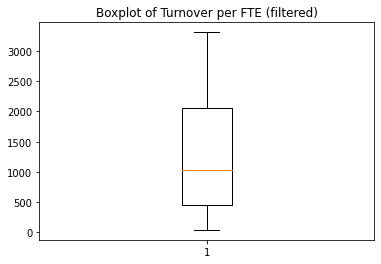

Number of excluded values: 0


In [7]:
# Subset the dataframe with the 50 smallest values
smallest_50 = df.nsmallest(50, 'turnover_per_FTE')

# Calculate mean and standard deviation
mean = np.mean(smallest_50['turnover_per_FTE'])
std = np.std(smallest_50['turnover_per_FTE'])

# Define a threshold for excluding small values
threshold = mean - 2 * std  # Example: 2 standard deviations below the mean

# Exclude data points with very small values
filtered_data = smallest_50[smallest_50['turnover_per_FTE'] >= threshold]

# Visualize filtered data (optional)
import matplotlib.pyplot as plt

plt.boxplot(filtered_data['turnover_per_FTE'])
plt.title('Boxplot of Turnover per FTE (filtered)')
plt.show()

# Exclude the filtered data points from the original dataset
df = df[~df.index.isin(filtered_data.index)]
# Calculate the number of excluded values
excluded_count = len(smallest_50) - len(filtered_data)

# Print the number of excluded values
print("Number of excluded values:", excluded_count)

In [8]:
print(df['turnover_per_FTE'].sort_values())
print(df.shape)

252       3463.41
164       3901.10
234       4000.00
182       4000.00
371       4000.00
          ...    
341    4086500.00
388    4339500.00
41     5382000.00
8      8124000.00
4      8303000.00
Name: turnover_per_FTE, Length: 339, dtype: float64
(339, 57)


In [60]:
df.to_csv('new_dataset.csv', index=False)

In [9]:
print(df['What was your firm’s turnover in the last calendar year? (in €)'].head())

0     209000
1    1860000
2    4278000
3    6556000
4    8303000
Name: What was your firm’s turnover in the last calendar year? (in €), dtype: int64


In [10]:
# Descriptive statistics of the dependent variable
dep_var_stats = df['What was your firm’s turnover in the last calendar year? (in €)'].describe()
print(dep_var_stats)

count    3.390000e+02
mean     2.481897e+06
std      2.335351e+06
min      2.100000e+04
25%      7.750000e+05
50%      1.541000e+06
75%      3.503500e+06
max      9.947000e+06
Name: What was your firm’s turnover in the last calendar year? (in €), dtype: float64


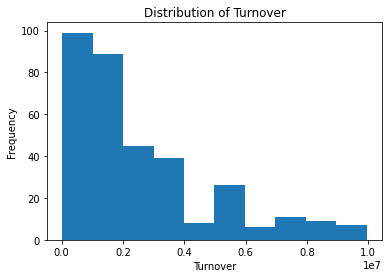

In [11]:
# Histogram of the dependent variable
plt.hist(df['What was your firm’s turnover in the last calendar year? (in €)'], bins=10)
plt.xlabel('Turnover')
plt.ylabel('Frequency')
plt.title('Distribution of Turnover')
plt.show()

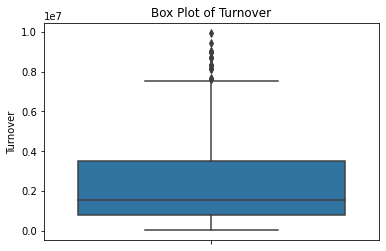

In [12]:
# Box plot of the dependent variable
sns.boxplot(y='What was your firm’s turnover in the last calendar year? (in €)', data=df)
plt.ylabel('Turnover')
plt.title('Box Plot of Turnover')
plt.show()

In [13]:
#indepedent variables creation 
df['avg_inv'] = df[['Your primary involvement with data is in entering data', 'Your primary involvement with data is in preparing visualizations', 'Your primary/major involvement with data is in understanding what happened in past or what is happening', 'Your primary/major involvement with data is in using data to predict what may happen']].mean(axis=1)
print(df['avg_inv'])
df['avg_inf'] = df[['My organization has central warehouse to store all data', 'My organization has one point of contact for all database related queries', 'My organization has one point of contact for all data analysis related queries', 'We have access to cloud computing platform (Azure/AWS/GCP/Digital Ocean)']].mean(axis=1)
print(df['avg_inf'])
df['avg_tools'] = df[['Extent to which spreadsheets (Excel/Libreoffice Cal/gnumeric etc.) are used in the organization', 'Extent to which prepreitory mathematical/statistical softwares (Matlab/SPSS etc.) are used in the organization', 'Extent to which statistical programming languages (R/Python/Scala) are used in the organization', 'Extent to which data visualization softwares (PowerBI/Tableau/Periscope etc.) are used in your organization']].mean(axis=1)
print(df['avg_tools'])
df['avg_open'] = df[['My organization is cooperating with external parties in the area of data.', 'The distance between data specialists and other staff is small.', 'Making mistakes in analyzing data is used to learn and improve', 'My organization stimulates experiments with new technology.', 'My organization shares data with other parties.']].mean(axis=1)
print(df['avg_open'])
df['avg_ds'] = df[['My organization uses product/service sales data', 'My organization uses financial data', 'My organization uses customer data (orders/subscriptions etc.)', 'My organization uses employee data']].mean(axis=1)
print(df['avg_ds'])
df['avg_comp'] = df[['There are plenty of opportunities to develop data skills', 'The management is aware of the possibilities of data', 'New (data) technologies are introduced quickly and smoothly', 'Support with problems related to data are well arranged']].mean(axis=1)
print(df['avg_comp'])
df['avg_dq'] = df[['I am confident that the data is relevant within my organization', 'I am confident that the data within my organization is accurate', 'I am confident that the data within my organization is up to date / recent', 'I am confident that the data within my organization is complete']].mean(axis=1)
print(df['avg_dq'])
df['avg_inn'] = df[['My organization strives for the rapid adoption of novelties in the field of data', 'My colleagues often bring new ideas and developments in the field of data to the table', 'The leadership is keen to capitalize on new developments in data immediately', 'Promising developments regarding data are quickly addressed', 'My organization has the resources and opportunities to quickly implement new developments']].mean(axis=1)
print(df['avg_inn'])
df['avg_safe'] = df[['Within my organization everyone uses the same software (Microsoft Office, Salesforce, Microsoft Dynamics, etc.)', 'My organization is aware of the importance of data security']].mean(axis=1)
print(df['avg_safe'])
df['avg_priv'] = df[['Within my organization, awareness of data ethics and privacy is highly developed', 'My organization is aware of the law and regulations regarding data (e.g. the GDPR)']].mean(axis=1)
print(df['avg_priv'])
df['avg_cult'] = df[['I have the resources to work on data-related projects in addition to my normal tasks', 'I know how to find help online for solving data-related issues (e.g. on forums or discussion groups)']].mean(axis=1)
print(df['avg_cult'])
df['avg_know'] = df[['What is your knowledge level of data visualization tools?', 'What is your knowledge level of Structured Query Language (SQL or similar)', 'What is your knowledge level of Application Prgramming Interface (API)', 'What is your knowledge level of file sharing services (Dropbox/onedrive etc.)', 'What is your knowledge level of artificial intelligence (reinforment learning)']].mean(axis=1)
print(df['avg_know'])
df['avg_soc'] = df[['When new data becomes available, I immediately use it to revise my position', 'I always strictly adhere to the applicable laws and regulations regarding data (e.g. the GDPR)']].mean(axis=1)
print(df['avg_soc'])
df['self_asses'] = df['Based on these five levels of data maturity, how would you rate your organization?'] 

0      2.25
1      1.00
2      1.25
3      4.50
4      4.00
       ... 
384    1.50
385    1.25
386    1.75
387    1.25
388    2.00
Name: avg_inv, Length: 339, dtype: float64
0      3.75
1      3.75
2      3.75
3      4.75
4      4.75
       ... 
384    1.75
385    2.25
386    2.00
387    2.00
388    2.50
Name: avg_inf, Length: 339, dtype: float64
0      3.25
1      3.75
2      3.25
3      3.50
4      3.75
       ... 
384    3.25
385    3.25
386    3.25
387    2.75
388    2.50
Name: avg_tools, Length: 339, dtype: float64
0      2.6
1      3.4
2      2.6
3      3.8
4      2.2
      ... 
384    4.0
385    4.0
386    4.2
387    3.0
388    3.6
Name: avg_open, Length: 339, dtype: float64
0      3.25
1      3.25
2      3.00
3      4.00
4      4.00
       ... 
384    3.50
385    4.25
386    3.00
387    3.75
388    2.25
Name: avg_ds, Length: 339, dtype: float64
0      3.50
1      1.75
2      3.75
3      3.25
4      3.50
       ... 
384    3.25
385    3.00
386    3.50
387    3.50
388    3.00
Na

In [14]:
columns_to_exclude = ['Your primary involvement with data is in entering data', 'Your primary involvement with data is in preparing visualizations', 'Your primary/major involvement with data is in understanding what happened in past or what is happening', 'Your primary/major involvement with data is in using data to predict what may happen', 
'My organization has central warehouse to store all data', 'My organization has one point of contact for all database related queries', 'My organization has one point of contact for all data analysis related queries', 'We have access to cloud computing platform (Azure/AWS/GCP/Digital Ocean)', 
'Extent to which spreadsheets (Excel/Libreoffice Cal/gnumeric etc.) are used in the organization', 'Extent to which prepreitory mathematical/statistical softwares (Matlab/SPSS etc.) are used in the organization', 'Extent to which statistical programming languages (R/Python/Scala) are used in the organization', 'Extent to which data visualization softwares (PowerBI/Tableau/Periscope etc.) are used in your organization', 
'My organization is cooperating with external parties in the area of data.', 'The distance between data specialists and other staff is small.', 'Making mistakes in analyzing data is used to learn and improve', 'My organization stimulates experiments with new technology.', 'My organization shares data with other parties.', 
'My organization uses product/service sales data', 'My organization uses financial data', 'My organization uses customer data (orders/subscriptions etc.)', 'My organization uses employee data', 
'There are plenty of opportunities to develop data skills', 'The management is aware of the possibilities of data', 'New (data) technologies are introduced quickly and smoothly', 'Support with problems related to data are well arranged', 
'I am confident that the data is relevant within my organization', 'I am confident that the data within my organization is accurate', 'I am confident that the data within my organization is up to date / recent', 'I am confident that the data within my organization is complete', 
'My organization strives for the rapid adoption of novelties in the field of data', 'My colleagues often bring new ideas and developments in the field of data to the table', 'The leadership is keen to capitalize on new developments in data immediately', 'Promising developments regarding data are quickly addressed', 'My organization has the resources and opportunities to quickly implement new developments', 
'Within my organization everyone uses the same software (Microsoft Office, Salesforce, Microsoft Dynamics, etc.)', 'My organization is aware of the importance of data security', 
'Within my organization, awareness of data ethics and privacy is highly developed', 'My organization is aware of the law and regulations regarding data (e.g. the GDPR)',
'I have the resources to work on data-related projects in addition to my normal tasks', 'I know how to find help online for solving data-related issues (e.g. on forums or discussion groups)', 
'What is your knowledge level of data visualization tools?', 'What is your knowledge level of Structured Query Language (SQL or similar)', 'What is your knowledge level of Application Prgramming Interface (API)', 'What is your knowledge level of file sharing services (Dropbox/onedrive etc.)', 'What is your knowledge level of artificial intelligence (reinforment learning)', 
'When new data becomes available, I immediately use it to revise my position', 'I always strictly adhere to the applicable laws and regulations regarding data (e.g. the GDPR)', 
'Based on these five levels of data maturity, how would you rate your organization?']
df = df.drop(columns=columns_to_exclude)






In [15]:
print(df.columns)

Index(['My age', 'My highest education',
       'In my function I carry managerial responsibility (executive, end responsible, partner)',
       'My enterprise is active in the following branche/industry',
       'Please indicate your company`s age in years',
       'How many FTE are in your organization?',
       'What was your firm’s turnover in the last calendar year? (in €)',
       'How much time do you spend on average per day working with data in your current role?',
       'turnover_per_FTE', 'avg_inv', 'avg_inf', 'avg_tools', 'avg_open',
       'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv',
       'avg_cult', 'avg_know', 'avg_soc', 'self_asses'],
      dtype='object')


In [16]:
indpendent_vars = ['avg_inv', 'avg_inf', 'avg_tools', 'avg_open',
       'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv',
       'avg_cult', 'avg_know', 'avg_soc', 'self_asses']

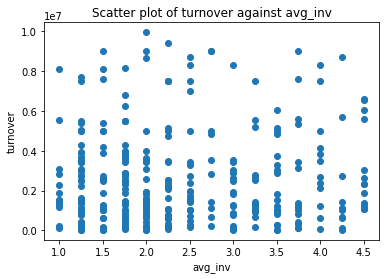

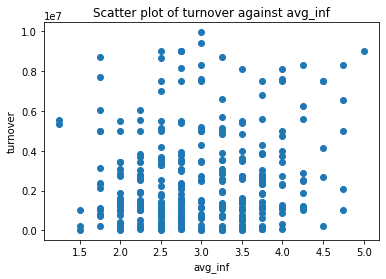

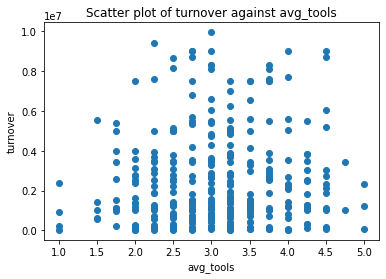

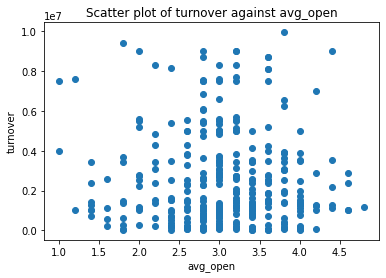

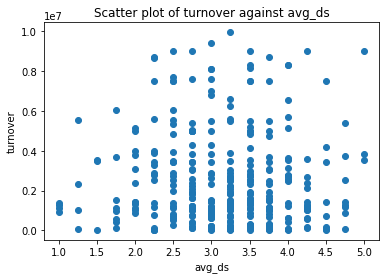

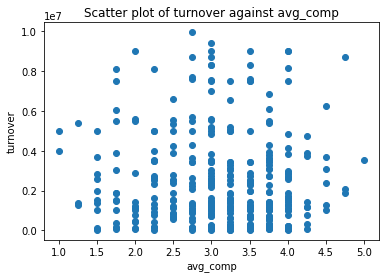

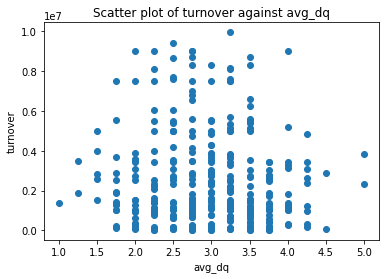

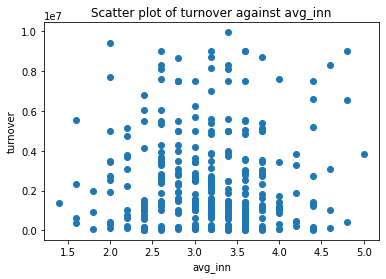

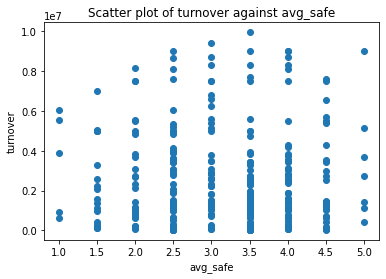

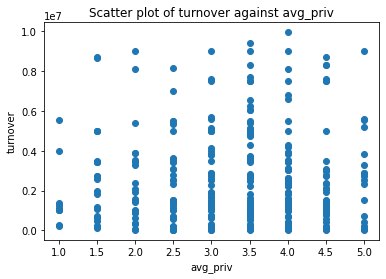

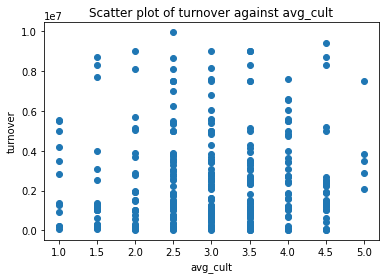

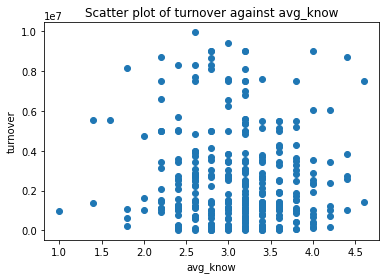

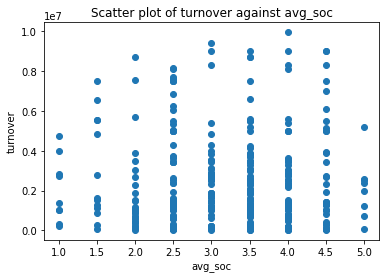

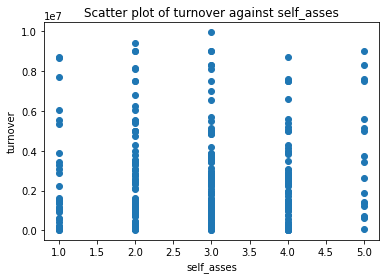

In [17]:
for var in indpendent_vars:
    # Create a scatter plot of the dependent variable against the current independent variable
    plt.scatter(df[var], df['What was your firm’s turnover in the last calendar year? (in €)'])
    plt.xlabel(var)
    plt.ylabel('turnover')
    plt.title(f'Scatter plot of turnover against {var}')
    plt.show()

In [18]:
correlation_matrix = df[['avg_inv', 'avg_inf', 'avg_tools', 'avg_open',
       'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv',
       'avg_cult', 'avg_know', 'avg_soc', 'self_asses']].corr()
print(correlation_matrix)

             avg_inv   avg_inf  avg_tools  avg_open    avg_ds  avg_comp  \
avg_inv     1.000000  0.265589   0.199013  0.073492  0.095456  0.148719   
avg_inf     0.265589  1.000000   0.230341  0.146036  0.234814  0.178116   
avg_tools   0.199013  0.230341   1.000000  0.500643  0.319941  0.107314   
avg_open    0.073492  0.146036   0.500643  1.000000  0.342461  0.122808   
avg_ds      0.095456  0.234814   0.319941  0.342461  1.000000  0.416071   
avg_comp    0.148719  0.178116   0.107314  0.122808  0.416071  1.000000   
avg_dq      0.193191  0.131984   0.181585  0.105177  0.264096  0.480939   
avg_inn     0.186366  0.136676   0.294208  0.211790  0.405531  0.258716   
avg_safe   -0.005914  0.161441   0.156703  0.183630  0.336788  0.144216   
avg_priv    0.152377  0.211168   0.251321  0.199575  0.409206  0.282890   
avg_cult    0.286329  0.310109   0.202234  0.119174  0.286084  0.313314   
avg_know   -0.072679 -0.006737   0.284788  0.226535  0.217543  0.057773   
avg_soc     0.005916  0.0

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['avg_inv', 'avg_inf', 'avg_tools', 'avg_open',
       'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv',
       'avg_cult', 'avg_know', 'avg_soc', 'self_asses']]
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       Feature        VIF
0      avg_inv   8.475254
1      avg_inf  22.002643
2    avg_tools  26.352197
3     avg_open  27.602076
4       avg_ds  29.943786
5     avg_comp  25.668618
6       avg_dq  29.676868
7      avg_inn  35.030762
8     avg_safe  17.737435
9     avg_priv  16.901048
10    avg_cult  16.108210
11    avg_know  35.660010
12     avg_soc  18.307675
13  self_asses  11.894679


In [20]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the column names for the independent variables
independent_columns = ['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn',
                       'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc']

# Define the column names for the dependent variable and control variables
dependent_column = 'What was your firm’s turnover in the last calendar year? (in €)'
control_columns = ['My enterprise is active in the following branche/industry',
       'Please indicate your company`s age in years',
       'How many FTE are in your organization?']

# Create a new dataframe with the independent, dependent, and control variables
df_selected = df[independent_columns + [dependent_column] + control_columns].copy().reset_index(drop=True)

# Standardize the independent variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected[independent_columns])

# Perform PCA
pca = PCA(n_components=10)
pca_features = pca.fit_transform(df_scaled)

# Create a new dataframe with PCA features, dependent variable, and control variables
df_pca = pd.DataFrame(pca_features, columns=['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10'])
df_pca = pd.concat([df_pca, df_selected[[dependent_column] + control_columns]], axis=1)

# Print the result of PCA features and their contributions
print("PCA Features:")
for i, feature in enumerate(['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10']):
    print(f"{feature}: {pca.explained_variance_ratio_[i] * 100:.2f}%")

# Print the new dataframe with PCA features, dependent variable, and control variables
print("\nNew Dataframe with PCA Features:")
print(df_pca.head())


PCA Features:
PCA_1: 28.59%
PCA_2: 12.41%
PCA_3: 9.25%
PCA_4: 7.57%
PCA_5: 6.99%
PCA_6: 6.16%
PCA_7: 5.16%
PCA_8: 4.87%
PCA_9: 4.61%
PCA_10: 4.40%

New Dataframe with PCA Features:
      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0 -0.067938 -1.938940 -0.435534  0.089356 -0.205231 -1.445999  1.025864   
1  0.731671  2.236217 -1.863039 -1.873325 -0.892319 -1.101064  0.896537   
2 -0.519577  0.116712  0.578197 -1.150329 -0.700234 -0.963445 -1.099488   
3 -2.749203 -1.942856 -2.229768 -2.268279 -0.049514  1.763710  0.165045   
4 -2.466312 -1.824844 -0.673015 -0.517526 -1.406771 -0.354104  0.054618   

      PCA_8     PCA_9    PCA_10  \
0 -0.695350 -0.138313 -0.169144   
1 -0.534885  0.032112 -0.476540   
2 -0.845992  0.297626 -0.302745   
3 -0.026625 -0.275370  0.115428   
4  1.086622 -1.434060 -0.881809   

   What was your firm’s turnover in the last calendar year? (in €)  \
0                                             209000                 
1                

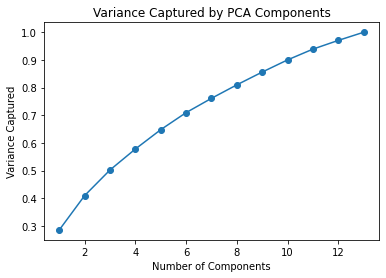

PCA Features:
PCA_1: 28.59%
PCA_2: 12.41%
PCA_3: 9.25%
PCA_4: 7.57%
PCA_5: 6.99%
PCA_6: 6.16%
PCA_7: 5.16%
PCA_8: 4.87%
PCA_9: 4.61%
PCA_10: 4.40%

New Dataframe with PCA Features:
      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0 -0.067938 -1.938940 -0.435534  0.089356 -0.205231 -1.445999  1.025864   
1  0.731671  2.236217 -1.863039 -1.873325 -0.892319 -1.101064  0.896537   
2 -0.519577  0.116712  0.578197 -1.150329 -0.700234 -0.963445 -1.099488   
3 -2.749203 -1.942856 -2.229768 -2.268279 -0.049514  1.763710  0.165045   
4 -2.466312 -1.824844 -0.673015 -0.517526 -1.406771 -0.354104  0.054618   

      PCA_8     PCA_9    PCA_10  \
0 -0.695350 -0.138313 -0.169144   
1 -0.534885  0.032112 -0.476540   
2 -0.845992  0.297626 -0.302745   
3 -0.026625 -0.275370  0.115428   
4  1.086622 -1.434060 -0.881809   

   What was your firm’s turnover in the last calendar year? (in €)  \
0                                             209000                 
1                

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the column names for the independent variables
independent_columns = ['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn',
                       'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc']

# Define the column names for the dependent variable and control variables
dependent_column = 'What was your firm’s turnover in the last calendar year? (in €)'
control_columns = ['My enterprise is active in the following branche/industry',
                   'Please indicate your company`s age in years',
                   'How many FTE are in your organization?']

# Create a new dataframe with the independent, dependent, and control variables
df_selected = df[independent_columns + [dependent_column] + control_columns].copy().reset_index(drop=True)

# Standardize the independent variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected[independent_columns])

# Perform PCA for different component numbers
component_numbers = range(1, 14)
variance_captured = []
for n in component_numbers:
    pca = PCA(n_components=n)
    pca_features = pca.fit_transform(df_scaled)
    variance_captured.append(np.sum(pca.explained_variance_ratio_))

# Plot the captured variance
plt.plot(component_numbers, variance_captured, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Variance Captured')
plt.title('Variance Captured by PCA Components')
plt.show()

# Perform PCA
pca = PCA(n_components=10)
pca_features = pca.fit_transform(df_scaled)


# Create a new dataframe with PCA features, dependent variable, and control variables
df_pca = pd.DataFrame(pca_features, columns=['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10'])
df_pca = pd.concat([df_pca, df_selected[[dependent_column] + control_columns]], axis=1)

# Print the result of PCA features and their contributions
print("PCA Features:")
for i, feature in enumerate(['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10']):
    print(f"{feature}: {pca.explained_variance_ratio_[i] * 100:.2f}%")

# Print the new dataframe with PCA features, dependent variable, and control variables
print("\nNew Dataframe with PCA Features:")
print(df_pca.head())


In [22]:
df_pca

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,What was your firm’s turnover in the last calendar year? (in €),My enterprise is active in the following branche/industry,Please indicate your company`s age in years,How many FTE are in your organization?
0,-0.067938,-1.938940,-0.435534,0.089356,-0.205231,-1.445999,1.025864,-0.695350,-0.138313,-0.169144,209000,73,3,36
1,0.731671,2.236217,-1.863039,-1.873325,-0.892319,-1.101064,0.896537,-0.534885,0.032112,-0.476540,1860000,43,18,96
2,-0.519577,0.116712,0.578197,-1.150329,-0.700234,-0.963445,-1.099488,-0.845992,0.297626,-0.302745,4278000,41,13,18
3,-2.749203,-1.942856,-2.229768,-2.268279,-0.049514,1.763710,0.165045,-0.026625,-0.275370,0.115428,6556000,26,11,80
4,-2.466312,-1.824844,-0.673015,-0.517526,-1.406771,-0.354104,0.054618,1.086622,-1.434060,-0.881809,8303000,93,46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,-0.756768,0.864550,0.613920,1.211747,1.139451,-0.620164,1.728123,-0.255173,0.375838,0.614211,5004000,45,13,5
335,-1.046967,1.697433,0.517853,-0.479293,1.348774,-0.046936,0.907281,-0.143338,0.352274,-0.144549,1440000,46,26,25
336,-1.243113,1.444742,0.633976,0.722863,0.687782,-0.155802,0.839600,-0.450275,1.378509,-0.437027,2881000,23,16,65
337,0.243234,0.707233,0.920285,-1.947353,0.821841,1.401292,0.005507,-0.532289,0.349648,2.409594,3450000,23,108,6


In [23]:
df_pca.to_csv('df_pca1.csv', index=False)

In [201]:
# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(pca_loadings.T, columns=['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5' , 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10' ], index=['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc'])

# Display the loadings
print("Loadings of the original variables:")
print(loadings_df)

ValueError: Shape of passed values is (13, 5), indices imply (13, 10)

In [24]:
print(df_pca.columns)

Index(['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
       'PCA_9', 'PCA_10',
       'What was your firm’s turnover in the last calendar year? (in €)',
       'My enterprise is active in the following branche/industry',
       'Please indicate your company`s age in years',
       'How many FTE are in your organization?'],
      dtype='object')


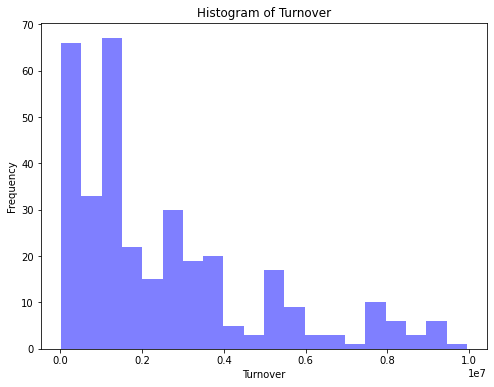

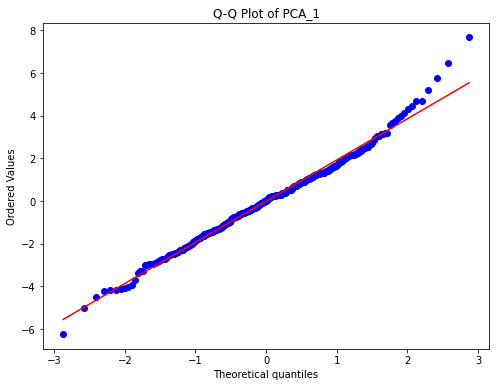

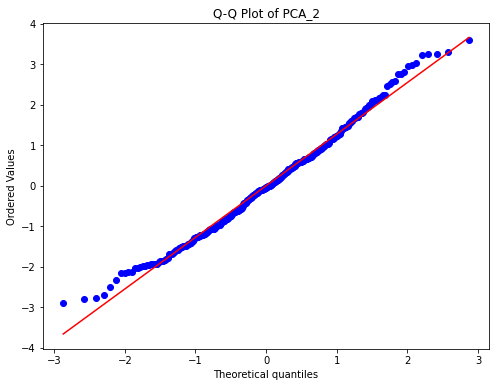

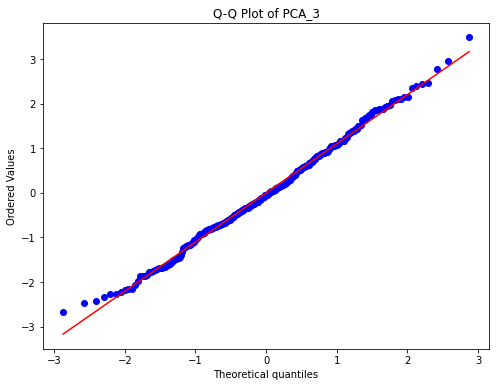

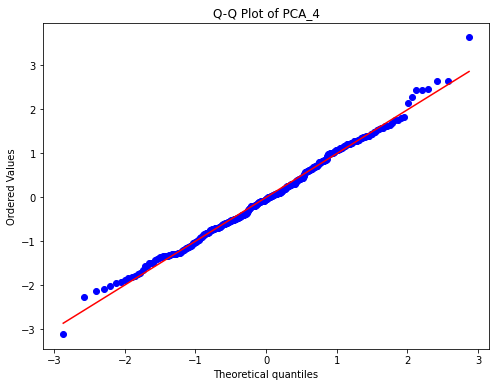

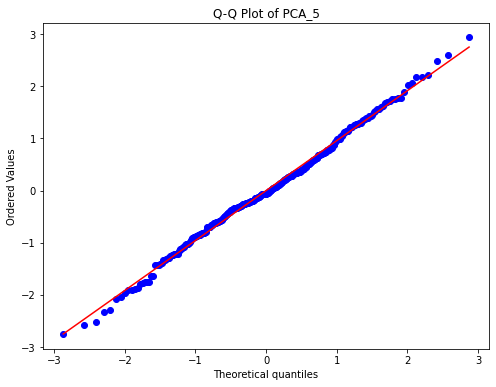

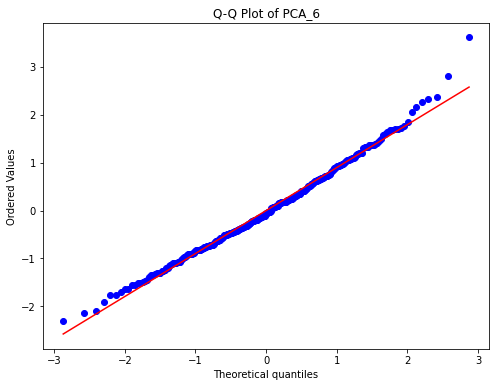

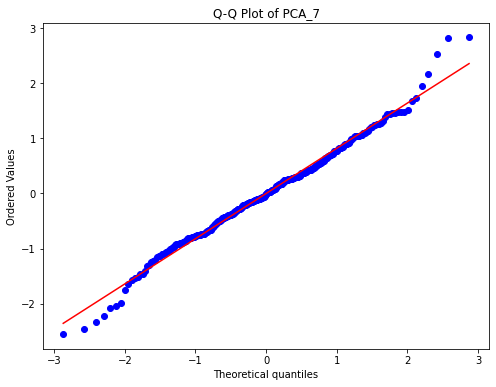

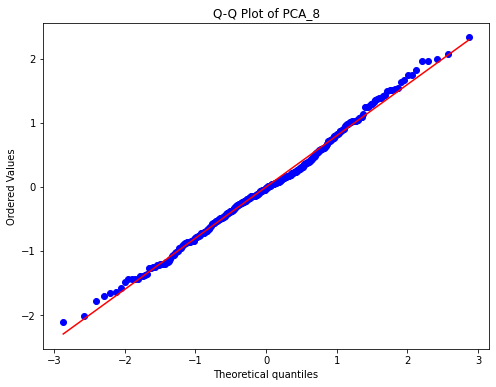

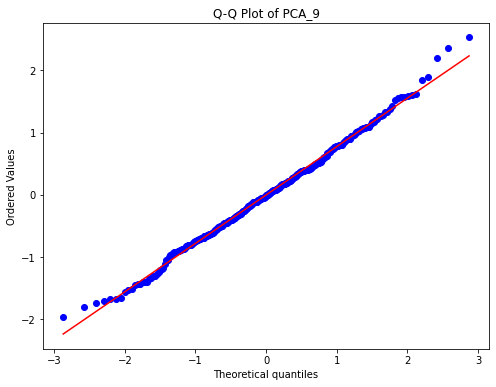

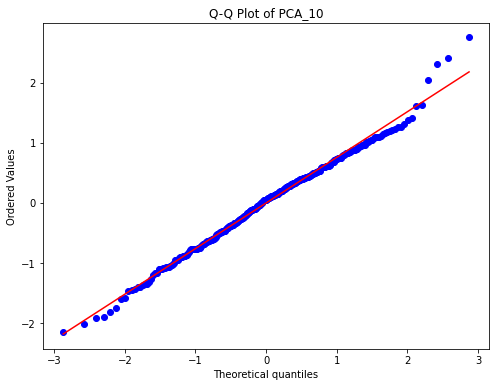

Shapiro-Wilk test for PCA_1: p-value = 0.022309480234980583
Shapiro-Wilk test for PCA_2: p-value = 0.015703411772847176
Shapiro-Wilk test for PCA_3: p-value = 0.42563512921333313
Shapiro-Wilk test for PCA_4: p-value = 0.247165709733963
Shapiro-Wilk test for PCA_5: p-value = 0.4715109169483185
Shapiro-Wilk test for PCA_6: p-value = 0.03868185356259346
Shapiro-Wilk test for PCA_7: p-value = 0.020095616579055786
Shapiro-Wilk test for PCA_8: p-value = 0.2551339268684387
Shapiro-Wilk test for PCA_9: p-value = 0.48940223455429077
Shapiro-Wilk test for PCA_10: p-value = 0.09736083447933197


In [25]:
# Checking normality of the dependent variable (turnover)
plt.figure(figsize=(8, 6))
plt.hist(df_pca['What was your firm’s turnover in the last calendar year? (in €)'], bins=20, color='blue', alpha=0.5)
plt.xlabel('Turnover')
plt.ylabel('Frequency')
plt.title('Histogram of Turnover')
plt.show()

# Checking normality of PCA features using Q-Q plots
pca_features = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10']  

for var in pca_features:
    plt.figure(figsize=(8, 6))
    stats.probplot(df_pca[var], dist='norm', plot=plt)
    plt.title(f'Q-Q Plot of {var}')
    plt.show()

# Checking normality of PCA features using Shapiro-Wilk test
for var in pca_features:
    stat, p = stats.shapiro(df_pca[var])
    print(f'Shapiro-Wilk test for {var}: p-value = {p}')


In [26]:
df_pca['log_turnover'] = np.log(df_pca['What was your firm’s turnover in the last calendar year? (in €)'] + 1)  # Adding 1 to avoid issues with zero values

# Verify the transformation
print(df_pca['log_turnover'])

0      12.250094
1      14.436088
2      15.268996
3      15.695891
4      15.932128
         ...    
334    15.425748
335    14.180154
336    14.873648
337    15.053885
338    15.976417
Name: log_turnover, Length: 339, dtype: float64


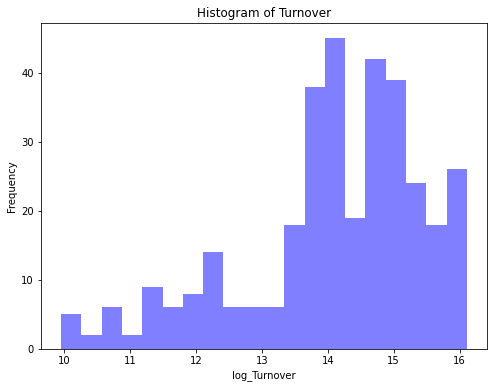

In [27]:
# Checking normality of the dependent variable (turnover)
plt.figure(figsize=(8, 6))
plt.hist(df_pca['log_turnover'], bins=20, color='blue', alpha=0.5)
plt.xlabel('log_Turnover')
plt.ylabel('Frequency')
plt.title('Histogram of Turnover')
plt.show()

In [28]:
# Calculate summary statistics for 'My age'
age_stats = df['My age'].describe()

# Calculate summary statistics for 'My highest education'
education_stats = df['My highest education'].value_counts()

# Calculate summary statistics for 'In my function I carry managerial responsibility'
responsibility_stats = df['In my function I carry managerial responsibility (executive, end responsible, partner)'].value_counts()

# Calculate summary statistics for 'My enterprise is active in the following branch/industry'
industry_stats = df['My enterprise is active in the following branche/industry'].value_counts()

# Calculate summary statistics for 'Please indicate your company's age in years'
company_age_stats = df['Please indicate your company`s age in years'].describe()

# Calculate summary statistics for 'How many FTE are in your organization?'
fte_stats = df['How many FTE are in your organization?'].describe()

# Calculate summary statistics for 'What was your firm's turnover in the last calendar year? (in €)'
turnover_stats = df['What was your firm’s turnover in the last calendar year? (in €)'].describe()

# Calculate summary statistics for 'How much time do you spend on average per day working with data in your current role?'
#data_time_stats = df['How much time do you spend on average per day working with data in your current role'].describe()

# Print the summary statistics for each variable
print("Summary Statistics for 'My age':")
print(age_stats)
print()

print("Summary Statistics for 'My highest education':")
print(education_stats)
print()

print("Summary Statistics for 'In my function I carry managerial responsibility':")
print(responsibility_stats)
print()

print("Summary Statistics for 'My enterprise is active in the following branch/industry':")
print(industry_stats)
print()

print("Summary Statistics for 'Please indicate your company's age in years':")
print(company_age_stats)
print()

print("Summary Statistics for 'How many FTE are in your organization?':")
print(fte_stats)
print()

print("Summary Statistics for 'What was your firm's turnover in the last calendar year? (in €)':")
print(turnover_stats)
print()

#print("Summary Statistics for 'How much time do you spend on average per day working with data in your current role?':")
#print(data_time_stats)
#print()

Summary Statistics for 'My age':
count    339.000000
mean      45.000000
std       10.382621
min       20.000000
25%       35.000000
50%       45.000000
75%       55.000000
max       65.000000
Name: My age, dtype: float64

Summary Statistics for 'My highest education':
Master degree          140
Bachelor degree        108
Secondary education     85
Primary education        6
Name: My highest education, dtype: int64

Summary Statistics for 'In my function I carry managerial responsibility':
Yes    275
No      64
Name: In my function I carry managerial responsibility (executive, end responsible, partner), dtype: int64

Summary Statistics for 'My enterprise is active in the following branch/industry':
46    53
43    27
38    19
41    18
68    16
45    15
47    15
52    12
64    12
49    10
23     9
66     8
10     8
36     7
28     7
71     7
20     6
35     6
25     6
13     6
96     6
11     4
84     4
93     4
62     3
77     3
87     3
88     3
16     3
73     3
61     2
14     2
31  

In [90]:
# Fit multiple regression model
X = df[['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc']]
y = df['log_turnover']

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

# Extract the residuals
residuals = results.resid

# Fit an auxiliary regression model to test for heteroscedasticity
auxiliary_model = sm.OLS(residuals ** 2, sm.add_constant(X))
auxiliary_results = auxiliary_model.fit()

# Extract the necessary statistics
nobs = results.nobs
R_squared = results.rsquared
R_squared_aux = auxiliary_results.rsquared

# Calculate the test statistic and p-value
test_statistic = (R_squared_aux - R_squared) * nobs
p_value = chi2.sf(test_statistic, len(X.columns))

# Print the results
print("Breusch-Pagan Test:")
print(f"Test Statistic: {test_statistic}")
print(f"p-value: {p_value}")

KeyError: 'log_turnover'

In [29]:
# Calculate the average of the independent variables and create a new column
df['avg_dm'] = df[['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn',
                   'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc']].mean(axis=1)

# Create a new dataset by dropping the old independent variables
df_avg = df.drop(['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn',
                  'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc'], axis=1)


In [30]:
columns_to_drop = ['My age', 'My highest education', 'In my function I carry managerial responsibility (executive, end responsible, partner)',
                    'How much time do you spend on average per day working with data in your current role?',
       'turnover_per_FTE']

df_avg = df_avg.drop(columns_to_drop, axis=1)


In [31]:
column_names = {'My enterprise is active in the following branche/industry': 'Industry',
                'Please indicate your company`s age in years': 'Age',
                'How many FTE are in your organization?': 'FTE', 
                'What was your firm’s turnover in the last calendar year? (in €)' : 'turnover'}

# Rename the columns using the rename() function
df_avg = df_avg.rename(columns=column_names)

In [32]:
print(df_avg.columns)

Index(['Industry', 'Age', 'FTE', 'turnover', 'self_asses', 'avg_dm'], dtype='object')


In [33]:
import statsmodels.api as sm

# Create a new DataFrame with the dependent and independent variables
df_model = pd.DataFrame({'turnover': df_avg['turnover'], 'self_asses': df_avg['self_asses'], 'avg_dm': df_avg['avg_dm']})

# Specify the independent variables and the constant term
X = df_model[['self_asses', 'avg_dm']]
X = sm.add_constant(X)  # Add constant term

# Specify the dependent variable
y = df_model['turnover']

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               turnover   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1890
Date:                Sun, 25 Jun 2023   Prob (F-statistic):              0.828
Time:                        22:17:51   Log-Likelihood:                -5451.3
No. Observations:                 339   AIC:                         1.091e+04
Df Residuals:                     336   BIC:                         1.092e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.146e+06   9.29e+05      2.310      0.0

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [34]:
# Define the encoding dictionary
sector_encoding = {
    1: 'Agriculture',
    8: 'Mining',
    10: 'Manufacturing',
    11: 'Manufacturing',
    13: 'Manufacturing',
    14: 'Manufacturing',
    16: 'Manufacturing',
    17: 'Manufacturing',
    18: 'Manufacturing',
    20: 'Manufacturing',
    21: 'Manufacturing',
    22: 'Manufacturing',
    23: 'Manufacturing',
    24: 'Manufacturing',
    25: 'Manufacturing',
    26: 'Manufacturing',
    27: 'Manufacturing',
    28: 'Manufacturing',
    29: 'Manufacturing',
    30: 'Manufacturing',
    31: 'Manufacturing',
    32: 'Manufacturing',
    35: 'Electricity',
    36: 'Water_supply',
    38: 'Water_supply',
    41: 'Construction',
    42: 'Construction',
    43: 'Construction',
    45: 'Wholesale_retail',
    46: 'Wholesale_retail',
    47: 'Wholesale_retail',
    49: 'Transportation_storage',
    52: 'Transportation_storage',
    55: 'Accommodation',
    56: 'Accommodation',
    58: 'IT',
    61: 'IT',
    62: 'IT',
    63: 'IT',
    64: 'Finance',
    66: 'Finance',
    68: 'Real_estate',
    69: 'Consultancy',
    70: 'Consultancy',
    71: 'Consultancy',
    73: 'Consultancy',
    77: 'Renting',
    81: 'Renting',
    82: 'Renting',
    84: 'Public_administration',
    85: 'Public_administration',
    86: 'Healthcare',
    87: 'Healthcare',
    88: 'Healthcare',
    90: 'Culture',
    91: 'Culture',
    93: 'Culture',
    94: 'Other',
    96: 'Other'
}

# Add the 'sector' column based on the encoding
df_avg['Industry'] = df_avg['Industry'].map(sector_encoding)

In [35]:
df_avg

,Industry,Age,FTE,turnover,self_asses,avg_dm
0,Consultancy,3,36,209000,2,3.057692
1,Construction,18,96,1860000,3,2.896154
2,Construction,13,18,4278000,4,3.153846
3,Manufacturing,11,80,6556000,3,3.680769
4,Culture,46,1,8303000,5,3.692308
...,...,...,...,...,...,...
384,Wholesale_retail,13,5,5004000,2,3.150000
385,Wholesale_retail,26,25,1440000,2,3.169231
386,Manufacturing,16,65,2881000,1,3.253846
387,Manufacturing,108,6,3450000,2,2.919231


In [37]:
import pandas as pd
import statsmodels.api as sm

# Create a new DataFrame with the dependent variable, independent variables, and control variables
df_model = pd.DataFrame({'turnover': df_avg['turnover'], 'self_asses': df_avg['self_asses'], 'avg_dm': df_avg['avg_dm'],
                         'FTE': df_avg['FTE'], 'Age': df_avg['Age'], 'Industry': df_avg['Industry']})

# Perform dummy encoding for the 'Industry' variable
dummy_variables = pd.get_dummies(df_model['Industry'], prefix='Industry', drop_first=True)
df_model = pd.concat([df_model, dummy_variables], axis=1)
df_model.drop('Industry', axis=1, inplace=True)

# Specify the independent variables and the constant term
X = df_model[['self_asses', 'avg_dm', 'FTE', 'Age'] + dummy_variables.columns.tolist()]
X = sm.add_constant(X)  # Add constant term

# Specify the dependent variable
y = df_model['turnover']

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               turnover   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.828
Date:                Sun, 25 Jun 2023   Prob (F-statistic):             0.0173
Time:                        22:18:26   Log-Likelihood:                -5433.1
No. Observations:                 339   AIC:                         1.091e+04
Df Residuals:                     318   BIC:                         1.099e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Correlation Matrix:
            self_asses    avg_dm
self_asses    1.000000  0.396624
avg_dm        0.396624  1.000000

VIF Scores:
     Variable  VIF Score
0  self_asses   9.701011
1      avg_dm   9.701011


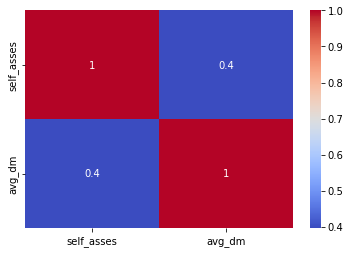

In [38]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the DataFrame with the selected independent variables
df_subset = df_avg[['self_asses', 'avg_dm']]

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Calculate the VIF scores
vif = pd.DataFrame()
vif["Variable"] = df_subset.columns
vif["VIF Score"] = [variance_inflation_factor(df_subset.values, i) for i in range(df_subset.shape[1])]

# Print the correlation matrix and VIF scores
print("Correlation Matrix:")
print(correlation_matrix)

print("\nVIF Scores:")
print(vif)


In [39]:
print(df_pca.columns)

Index(['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
       'PCA_9', 'PCA_10',
       'What was your firm’s turnover in the last calendar year? (in €)',
       'My enterprise is active in the following branche/industry',
       'Please indicate your company`s age in years',
       'How many FTE are in your organization?', 'log_turnover'],
      dtype='object')


In [40]:
import numpy as np

# Create an array of the independent variables
X = df_pca[['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10']].values

# Check for missing values
missing_values = np.isnan(X)
print("Missing Values:")
print(missing_values)

# Check for infinite values
infinite_values = np.isinf(X)
print("Infinite Values:")
print(infinite_values)


Missing Values:
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Infinite Values:
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [41]:
print(df_pca.columns)

Index(['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
       'PCA_9', 'PCA_10',
       'What was your firm’s turnover in the last calendar year? (in €)',
       'My enterprise is active in the following branche/industry',
       'Please indicate your company`s age in years',
       'How many FTE are in your organization?', 'log_turnover'],
      dtype='object')


In [49]:
df_pca.to_csv('df_pca.csv', index=False)


In [42]:
from sklearn.impute import SimpleImputer
# Create a new DataFrame with the dependent and independent variables
df_model = pd.DataFrame({'log_turnover': df_pca['log_turnover'], 'PCA_1': df_pca['PCA_1'],
                         'PCA_2': df_pca['PCA_2'], 'PCA_3': df_pca['PCA_3'],
                         'PCA_4': df_pca['PCA_4'], 'PCA_5': df_pca['PCA_5']})

# Specify the independent variables and the constant term
X = df_model[['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5']]
X = sm.add_constant(X)  # Add constant term

# Specify the dependent variable
y = df_model['log_turnover']



# Fit the multiple regression model with imputed data
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.636
Date:                Sun, 25 Jun 2023   Prob (F-statistic):              0.150
Time:                        22:19:22   Log-Likelihood:                -585.08
No. Observations:                 339   AIC:                             1182.
Df Residuals:                     333   BIC:                             1205.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0947      0.074    189.221      0.0

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [43]:
import pandas as pd
import statsmodels.api as sm
from sklearn.impute import SimpleImputer

# Create a new DataFrame with the dependent and independent variables
df_model = pd.DataFrame({'log_turnover': df_pca['log_turnover'], 'PCA_1': df_pca['PCA_1'],
                         'PCA_2': df_pca['PCA_2'], 'PCA_3': df_pca['PCA_3'],
                         'PCA_4': df_pca['PCA_4'], 'PCA_5': df_pca['PCA_5'],
                         'PCA_6': df_pca['PCA_6'], 'PCA_7': df_pca['PCA_7'],
                         'PCA_8': df_pca['PCA_8'], 'PCA_9': df_pca['PCA_9'],
                         'PCA_10': df_pca['PCA_10']})

# Specify the independent variables and the constant term
X = df_model[['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10']]
X = sm.add_constant(X)  # Add constant term

# Specify the dependent variable
y = df_model['log_turnover']

# Fit the multiple regression model with imputed data
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.8394
Date:                Sun, 25 Jun 2023   Prob (F-statistic):              0.591
Time:                        22:19:32   Log-Likelihood:                -584.91
No. Observations:                 339   AIC:                             1192.
Df Residuals:                     328   BIC:                             1234.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0947      0.075    187.889      0.0

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [144]:
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Create a new DataFrame with the dependent and independent variables
df_model = pd.DataFrame({'log_turnover': df_pca['log_turnover'], 'PCA_1': df_pca['PCA_1'],
                         'PCA_2': df_pca['PCA_2'], 'PCA_3': df_pca['PCA_3'],
                         'PCA_4': df_pca['PCA_4'], 'PCA_5': df_pca['PCA_5']})

# Specify the independent variables and the constant term
X = df_model[['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5']]
X = sm.add_constant(X)  # Add constant term

# Specify the dependent variable
y = df_model['log_turnover']

# Perform cross-validation
n_folds = 5  # Number of folds for cross-validation
fold_size = len(X) // n_folds  # Size of each fold
scoring_metrics = []  # List to store the evaluation metrics

# Initialize lists to store the predicted values and residuals for each fold
predicted_values = []
residuals = []

# Perform cross-validation
for i in range(n_folds):
    # Split the data into train and test sets for the current fold
    start_idx = i * fold_size
    end_idx = (i + 1) * fold_size
    X_train = pd.concat([X[:start_idx], X[end_idx:]])
    y_train = pd.concat([y[:start_idx], y[end_idx:]])
    X_test = X[start_idx:end_idx]
    y_test = y[start_idx:end_idx]

    # Fit the multiple regression model with imputed data
    model = sm.OLS(y_train, X_train)
    results = model.fit()

    # Predict the values for the test set
    y_pred = results.predict(X_test)

    # Store the predicted values and residuals
    predicted_values.extend(y_pred)
    residuals.extend(y_test - y_pred)

    # Evaluate the model using desired metrics (e.g., R-squared, mean squared error, etc.)
    r_squared = results.rsquared
    mse = np.mean((y_test - y_pred) ** 2)
    scoring_metrics.append((r_squared, mse))

# Calculate the mean of the evaluation metrics
mean_r_squared = np.mean([metric[0] for metric in scoring_metrics])
mean_mse = np.mean([metric[1] for metric in scoring_metrics])

# Print the cross-validation results
print("Cross-Validation R^2 Scores:", [metric[0] for metric in scoring_metrics])
print("Mean R^2:", mean_r_squared)
print("Cross-Validation MSE Scores:", [metric[1] for metric in scoring_metrics])
print("Mean MSE:", mean_mse)

# Fit the model using the entire dataset
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())




Cross-Validation R^2 Scores: [0.004923252237061804, 0.03452997472618091, 0.02343351790658854, 0.03265951251732746, 0.028902188128585915]
Mean R^2: 0.024889689103148926
Cross-Validation MSE Scores: [1.223141621480501, 2.12427720793097, 1.7689174425928482, 2.1574008473028, 2.3093831352165335]
Mean MSE: 1.9166240509047305
                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.636
Date:                Sat, 24 Jun 2023   Prob (F-statistic):              0.150
Time:                        12:17:16   Log-Likelihood:                -585.08
No. Observations:                 339   AIC:                             1182.
Df Residuals:                     333   BIC:                             1205.
Df Model:                           5          

In [44]:
column_names = {'My enterprise is active in the following branche/industry': 'Industry',
                'Please indicate your company`s age in years': 'Age',
                'How many FTE are in your organization?': 'FTE'}

# Rename the columns using the rename() function
df_pca = df_pca.rename(columns=column_names)

# Print the updated DataFrame
print(df_pca.columns)


Index(['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
       'PCA_9', 'PCA_10',
       'What was your firm’s turnover in the last calendar year? (in €)',
       'Industry', 'Age', 'FTE', 'log_turnover'],
      dtype='object')


In [45]:
# Define the encoding dictionary
sector_encoding = {
    1: 'Agriculture',
    8: 'Mining',
    10: 'Manufacturing',
    11: 'Manufacturing',
    13: 'Manufacturing',
    14: 'Manufacturing',
    16: 'Manufacturing',
    17: 'Manufacturing',
    18: 'Manufacturing',
    20: 'Manufacturing',
    21: 'Manufacturing',
    22: 'Manufacturing',
    23: 'Manufacturing',
    24: 'Manufacturing',
    25: 'Manufacturing',
    26: 'Manufacturing',
    27: 'Manufacturing',
    28: 'Manufacturing',
    29: 'Manufacturing',
    30: 'Manufacturing',
    31: 'Manufacturing',
    32: 'Manufacturing',
    35: 'Electricity',
    36: 'Water_supply',
    38: 'Water_supply',
    41: 'Construction',
    42: 'Construction',
    43: 'Construction',
    45: 'Wholesale_retail',
    46: 'Wholesale_retail',
    47: 'Wholesale_retail',
    49: 'Transportation_storage',
    52: 'Transportation_storage',
    55: 'Accommodation',
    56: 'Accommodation',
    58: 'IT',
    61: 'IT',
    62: 'IT',
    63: 'IT',
    64: 'Finance',
    66: 'Finance',
    68: 'Real_estate',
    69: 'Consultancy',
    70: 'Consultancy',
    71: 'Consultancy',
    73: 'Consultancy',
    77: 'Renting',
    81: 'Renting',
    82: 'Renting',
    84: 'Public_administration',
    85: 'Public_administration',
    86: 'Healthcare',
    87: 'Healthcare',
    88: 'Healthcare',
    90: 'Culture',
    91: 'Culture',
    93: 'Culture',
    94: 'Other',
    96: 'Other'
}

# Add the 'sector' column based on the encoding
df_pca['sector'] = df_pca['Industry'].map(sector_encoding)

In [46]:
print(df_pca.columns)

Index(['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
       'PCA_9', 'PCA_10',
       'What was your firm’s turnover in the last calendar year? (in €)',
       'Industry', 'Age', 'FTE', 'log_turnover', 'sector'],
      dtype='object')


In [51]:
# Encode 'Industry' variable using effect coding
industry_effects = pd.get_dummies(df_pca['sector'], drop_first=True).apply(lambda x: x - x.mean())
df_encoded = pd.concat([df_pca, industry_effects], axis=1)

# Define the independent variables and the dependent variable
X_pca = df_pca[['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
       'PCA_9', 'PCA_10']]
X_controls = df_encoded[['Age', 'FTE'] + list(industry_effects.columns)]
X = pd.concat([X_pca, X_controls], axis=1)
y = df_pca['log_turnover']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     1.827
Date:                Mon, 26 Jun 2023   Prob (F-statistic):            0.00776
Time:                        11:21:34   Log-Likelihood:                -563.31
No. Observations:                 339   AIC:                             1185.
Df Residuals:                     310   BIC:                             1296.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     13

In [56]:
print(df_pca.dtypes)

PCA_1                                                              float64
PCA_2                                                              float64
PCA_3                                                              float64
PCA_4                                                              float64
PCA_5                                                              float64
PCA_6                                                              float64
PCA_7                                                              float64
PCA_8                                                              float64
PCA_9                                                              float64
PCA_10                                                             float64
What was your firm’s turnover in the last calendar year? (in €)      int64
Industry                                                             int64
Age                                                                  int64
FTE                      

In [60]:
# Define the dependent variable
y = df_pca['log_turnover']

# Define the independent variables (PCA variables)
X = df_pca[['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5','PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10', 'Age']]

# Add a column of 1s for the intercept term
X = sm.add_constant(X)

# Include the interaction terms between PCA variables and AGE
X['PCA1_AGE_interaction'] = X['Age'] * X['PCA_1']
X['PCA2_AGE_interaction'] = X['Age'] * X['PCA_2']
X['PCA3_AGE_interaction'] = X['Age'] * X['PCA_3']
X['PCA4_AGE_interaction'] = X['Age'] * X['PCA_4']
X['PCA5_AGE_interaction'] = X['Age'] * X['PCA_5']
X['PCA6_AGE_interaction'] = X['Age'] * X['PCA_6']
X['PCA7_AGE_interaction'] = X['Age'] * X['PCA_7']
X['PCA8_AGE_interaction'] = X['Age'] * X['PCA_8']
X['PCA9_AGE_interaction'] = X['Age'] * X['PCA_9']
X['PCA10_AGE_interaction'] = X['Age'] * X['PCA_10']
# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.033
Date:                Mon, 26 Jun 2023   Prob (F-statistic):              0.423
Time:                        11:28:17   Log-Likelihood:                -577.97
No. Observations:                 339   AIC:                             1200.
Df Residuals:                     317   BIC:                             1284.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    14.00

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [62]:
# Define the dependent variable
y = df_pca['log_turnover']

# Define the independent variables (PCA variables)
X = df_pca[['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10', 'FTE']]

# Add a column of 1s for the intercept term
X = sm.add_constant(X)

# Include the interaction terms between PCA variables and AGE
X['PCA1_FTE_interaction'] = X['FTE'] * X['PCA_1']
X['PCA2_FTE_interaction'] = X['FTE'] * X['PCA_2']
X['PCA3_FTE_interaction'] = X['FTE'] * X['PCA_3']
X['PCA4_FTE_interaction'] = X['FTE'] * X['PCA_4']
X['PCA5_FTE_interaction'] = X['FTE'] * X['PCA_5']
X['PCA6_FTE_interaction'] = X['FTE'] * X['PCA_6']
X['PCA7_FTE_interaction'] = X['FTE'] * X['PCA_7']
X['PCA8_FTE_interaction'] = X['FTE'] * X['PCA_8']
X['PCA9_FTE_interaction'] = X['FTE'] * X['PCA_9']
X['PCA10_FTE_interaction'] = X['FTE'] * X['PCA_10']

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.354
Date:                Mon, 26 Jun 2023   Prob (F-statistic):              0.139
Time:                        11:45:08   Log-Likelihood:                -574.63
No. Observations:                 339   AIC:                             1193.
Df Residuals:                     317   BIC:                             1277.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    13.89

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [132]:
# Encode company industry using dummy variables
df_encoded = pd.get_dummies(df_pca, columns=['Industry'], drop_first=True)

# Define the dependent variable
y = df_encoded['log_turnover']

# Define the independent variables (PCA variables)
X = df_encoded[['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5']]

# Add a column of 1s for the intercept term
X = sm.add_constant(X)

# Create a list of industry columns
industry_columns = [column for column in df_encoded.columns if column.startswith('Industry_')]

# Loop through each industry column and test the moderating effect
for industry_column in industry_columns:
    # Extract the industry name from the column
    industry = industry_column.replace('Industry_', '')
    
    # Add the industry column to the independent variables
    X_with_industry = X.copy()
    X_with_industry[industry_column] = df_encoded[industry_column]
    
    # Fit the regression model
    model = sm.OLS(y, X_with_industry)
    results = model.fit()

    # Print the summary statistics for the current industry
    print(f"Industry: {industry}")
    print(results.summary())
    print("\n")


c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Industry: 10
                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.376
Date:                Fri, 23 Jun 2023   Prob (F-statistic):              0.224
Time:                        19:15:04   Log-Likelihood:                -585.03
No. Observations:                 339   AIC:                             1184.
Df Residuals:                     332   BIC:                             1211.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          14.0911      0.075    

In [133]:
# Encode company industry using dummy variables
df_encoded = pd.get_dummies(df_pca, columns=['Industry'], drop_first=True)

# Create a list of industry columns
industry_columns = [column for column in df_encoded.columns if column.startswith('Industry_')]

# Loop through each industry column and test the moderating effect
for industry_column in industry_columns:
    # Extract the industry name from the column
    industry = industry_column.replace('Industry_', '')
    
    # Filter the dataset to include only companies from the current industry
    df_filtered = df_encoded[df_encoded[industry_column] == 1]
    
    # Check if the current industry has at least 10 companies
    if df_filtered.shape[0] >= 10:
        # Define the dependent variable
        y = df_filtered['log_turnover']
    
        # Define the independent variables (PCA variables)
        X = df_filtered[['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5']]
    
        # Add a column of 1s for the intercept term
        X = sm.add_constant(X)
    
        # Add the industry column to the independent variables
        X[industry_column] = df_filtered[industry_column]
    
        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()
    
        # Print the summary statistics for the current industry
        print(f"Industry: {industry}")
        print(results.summary())
        print("\n")
    else:
        print(f"Industry '{industry}' does not have enough companies (less than 10). Skipping...\n")


Industry '10' does not have enough companies (less than 10). Skipping...

Industry '11' does not have enough companies (less than 10). Skipping...

Industry '13' does not have enough companies (less than 10). Skipping...

Industry '14' does not have enough companies (less than 10). Skipping...

Industry '16' does not have enough companies (less than 10). Skipping...

Industry '17' does not have enough companies (less than 10). Skipping...

Industry '18' does not have enough companies (less than 10). Skipping...

Industry '20' does not have enough companies (less than 10). Skipping...

Industry '21' does not have enough companies (less than 10). Skipping...

Industry '22' does not have enough companies (less than 10). Skipping...

Industry '23' does not have enough companies (less than 10). Skipping...

Industry '24' does not have enough companies (less than 10). Skipping...

Industry '25' does not have enough companies (less than 10). Skipping...

Industry '26' does not have enough com

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                 -0.337
Method:                 Least Squares   F-statistic:                   0.09328
Date:                Fri, 23 Jun 2023   Prob (F-statistic):              0.992
Time:                        19:18:19   Log-Likelihood:                -20.243
No. Observations:                  19   AIC:                             52.49
Df Residuals:                      13   BIC:                             58.15
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.3375      0.150     48.914      

c:\Users\OEM\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
c:\Users\OEM\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arg

In [63]:
print(df_pca.columns)

Index(['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
       'PCA_9', 'PCA_10',
       'What was your firm’s turnover in the last calendar year? (in €)',
       'Industry', 'Age', 'FTE', 'log_turnover', 'sector'],
      dtype='object')


In [137]:
df_pca.dtypes

PCA_1                                                              float64
PCA_2                                                              float64
PCA_3                                                              float64
PCA_4                                                              float64
PCA_5                                                              float64
What was your firm’s turnover in the last calendar year? (in €)      int64
Industry                                                             int64
Age                                                                  int64
FTE                                                                  int64
log_turnover                                                       float64
sector                                                              object
dtype: object

In [66]:
# Encode company industry using dummy variables
df_encoded = pd.get_dummies(df_pca, columns=['sector'], drop_first=True)

# Define the dependent variable
y = df_encoded['log_turnover']

# Define the independent variables (PCA variables)
X = df_encoded[['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10']]

# Add a column of 1s for the intercept term
X = sm.add_constant(X)

# Create a list of industry columns
industry_columns = [column for column in df_encoded.columns if column.startswith('sector_')]

# Loop through each industry column and test the moderating effect
for industry_column in industry_columns:
    # Extract the industry name from the column
    industry = industry_column.replace('sector_', '')
    
    # Add the industry column to the independent variables
    X_with_industry = X.copy()
    X_with_industry[industry_column] = df_encoded[industry_column]
    
    # Fit the regression model
    model = sm.OLS(y, X_with_industry)
    results = model.fit()

    # Print the summary statistics for the current industry
    print(f"sector: {industry}")
    print(results.summary())
    print("\n")

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


sector: Agriculture
                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.7987
Date:                Wed, 28 Jun 2023   Prob (F-statistic):              0.641
Time:                        12:29:41   Log-Likelihood:                -584.70
No. Observations:                 339   AIC:                             1193.
Df Residuals:                     327   BIC:                             1239.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

In [115]:
# Assuming your dataset is stored in a pandas DataFrame called 'df'
# Perform sector count
sector_counts = df_pca['Industry'].value_counts()

# Define the minimum number of representations for each sector
min_representations = 6

# Filter out sectors with fewer representations than the minimum
sectors_to_drop = sector_counts[sector_counts < min_representations].index
df_filtered = df_pca[~df_pca['Industry'].isin(sectors_to_drop)]

# Perform dummy encoding on the filtered dataset
df_encoded = pd.get_dummies(df_filtered, columns=['Industry'], prefix='Industry', drop_first=True)

# Define the dependent variable (log_turnover) and independent variables (PCA values)
y = df_encoded['log_turnover']
X = df_encoded[['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5']]

# Add a constant term to the independent variables
X_with_const = sm.add_constant(X)

# Create the OLS regression model with sector as a moderator
model = sm.OLS(y, X_with_const)

# Fit the model
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.333
Date:                Thu, 22 Jun 2023   Prob (F-statistic):              0.251
Time:                        20:33:39   Log-Likelihood:                -469.17
No. Observations:                 273   AIC:                             950.3
Df Residuals:                     267   BIC:                             972.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0871      0.083    169.855      0.0

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [125]:
# Count the number of occurrences for each industry
industry_counts = df_pca['Industry'].value_counts()

# Filter industries with at least 6 representatives
valid_industries = industry_counts[industry_counts >= 6].index

# Filter the dataset for valid industries
df_filtered = df_pca[df_pca['Industry'].isin(valid_industries)].copy()

# Print the filtered DataFrame
print(df_filtered.head())


      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5  \
1  0.731671  2.236217 -1.863039 -1.873325 -0.892319   
2 -0.519577  0.116712  0.578197 -1.150329 -0.700234   
6  2.160975  1.021045 -2.681338  0.592973  0.865057   
7  3.213388  0.803122 -0.766260 -1.148042 -0.833876   
8  0.775039  1.706642 -1.509536  0.266307  0.488720   

   What was your firm’s turnover in the last calendar year? (in €)  Industry  \
1                                            1860000                      43   
2                                            4278000                      41   
6                                            2719000                      25   
7                                             348000                      45   
8                                            8124000                      64   

   Age  FTE  log_turnover  
1   18   96     14.436088  
2   13   18     15.268996  
6   15   24     14.815775  
7   17   11     12.759961  
8   45    1     15.910333  


In [126]:


# Perform dummy encoding for the sector variable
df_encoded = pd.get_dummies(df_filtered, columns=['Industry'], drop_first=True)

# Create the design matrix X and the target variable y
X = df_encoded[['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5']]
X = sm.add_constant(X)  # Add constant column for intercept
y = df_encoded['log_turnover']

# Fit the OLS model with sector as a moderator
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.333
Date:                Thu, 22 Jun 2023   Prob (F-statistic):              0.251
Time:                        21:02:25   Log-Likelihood:                -469.17
No. Observations:                 273   AIC:                             950.3
Df Residuals:                     267   BIC:                             972.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0871      0.083    169.855      0.0

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [127]:


# Filter for sectors with at least 6 representatives
sector_counts = df_pca['Industry'].value_counts()
valid_sectors = sector_counts[sector_counts >= 6].index.tolist()
df_filtered = df_pca[df_pca['Industry'].isin(valid_sectors)].copy()

# Perform dummy encoding for sectors
df_encoded = pd.get_dummies(df_filtered, columns=['Industry'], drop_first=True)

# Define the independent variables (PCA values) and the dependent variable
X = df_encoded[['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5']]
y = df_encoded['log_turnover']

# Add a constant column to the independent variables
X = sm.add_constant(X)

# Fit the OLS model with sector as a moderator
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.333
Date:                Thu, 22 Jun 2023   Prob (F-statistic):              0.251
Time:                        21:06:03   Log-Likelihood:                -469.17
No. Observations:                 273   AIC:                             950.3
Df Residuals:                     267   BIC:                             972.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0871      0.083    169.855      0.0

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
# Independent variables (X) and dependent variable (y)
X = df[['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc']]
y = df['log_turnover']

# Create and fit the multiple regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 0.08012738  0.12844217  0.13572396 -0.10114318 -0.09372406 -0.0342168
 -0.14678497 -0.11786897  0.02462227  0.01476229  0.08680898 -0.01104225
  0.02739196]
Intercept: 14.185771156020596


In [32]:
df.rename(columns={'My enterprise is active in the following branche/industry': 'industry',
                   'Please indicate your company`s age in years': 'company_age',
                   'How many FTE are in your organization?': 'fte'}, inplace=True)


In [35]:
# Define the independent variables
independent_vars = ['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc']

# Define the control variables
control_vars = ['company_age', 'fte', 'industry']

# Encode the categorical variable 'industry'
df_encoded = pd.get_dummies(df, columns=['industry'], drop_first=True)

# Create the feature matrix X by combining the independent variables and control variables
X = df_encoded[independent_vars + control_vars]

# Create the target variable y
y = df_encoded['log_turnover']

# Fit the multiple regression model
model = LinearRegression()
model.fit(X, y)

# Retrieve the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

KeyError: "['industry'] not in index"

In [33]:
print(df.columns)

Index(['My age', 'My highest education',
       'In my function I carry managerial responsibility (executive, end responsible, partner)',
       'industry', 'company_age', 'fte',
       'What was your firm’s turnover in the last calendar year? (in €)',
       'How much time do you spend on average per day working with data in your current role?',
       'turnover_per_FTE', 'avg_inv', 'avg_inf', 'avg_tools', 'avg_open',
       'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv',
       'avg_cult', 'avg_know', 'avg_soc', 'self_asses', 'log_turnover'],
      dtype='object')


In [36]:
# Add a constant term to the independent variables
X = sm.add_constant(df[['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc']])
Y = df['log_turnover']

# Add the moderator variable
X['fte'] = df['fte']

# Fit the multiple regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.954
Date:                Tue, 20 Jun 2023   Prob (F-statistic):             0.0208
Time:                        00:08:47   Log-Likelihood:                -575.45
No. Observations:                 339   AIC:                             1181.
Df Residuals:                     324   BIC:                             1238.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2019      0.613     23.175      0.0

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [37]:
# Specify the independent variables
independent_vars = ['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc']

# Specify the moderator variable
moderator_var = 'company_age'

# Specify the dependent variable
dependent_var = 'log_turnover'

# Create the feature matrix X with the independent and moderator variables
X = df_encoded[independent_vars + [moderator_var]]

# Create the target variable y
y = df_encoded[dependent_var]

# Add a constant term to the feature matrix
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.7179
Date:                Tue, 20 Jun 2023   Prob (F-statistic):              0.756
Time:                        00:17:46   Log-Likelihood:                -584.01
No. Observations:                 339   AIC:                             1198.
Df Residuals:                     324   BIC:                             1255.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          14.1755      0.629     22.550      

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [38]:
# Add a constant term to the independent variables
X = sm.add_constant(df[['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc']])
Y = df['log_turnover']

# Add the moderator variable
X['company_age'] = df['company_age']

# Fit the multiple regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.7179
Date:                Tue, 20 Jun 2023   Prob (F-statistic):              0.756
Time:                        00:20:13   Log-Likelihood:                -584.01
No. Observations:                 339   AIC:                             1198.
Df Residuals:                     324   BIC:                             1255.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          14.1755      0.629     22.550      

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [41]:
# Encode the categorical variable 'sector' using dummy variables
df_encoded = pd.get_dummies(df, columns=['industry'], drop_first=True)

# Define the independent variables, dependent variable, and moderator
independent_vars = ['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc']
dependent_var = 'log_turnover'
moderator_var = df['industry']

# Create the feature matrix X by combining the independent variables and the encoded moderator variables
X = df_encoded[independent_vars + list(df_encoded.columns[df_encoded.columns.str.startswith('industry_')])]

# Create the target variable y
y = df_encoded[dependent_var]

# Add a constant term to the feature matrix X
X = sm.add_constant(X)

# Create the linear regression model with the moderator
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.253
Date:                Tue, 20 Jun 2023   Prob (F-statistic):              0.106
Time:                        00:24:36   Log-Likelihood:                -541.19
No. Observations:                 339   AIC:                             1224.
Df Residuals:                     268   BIC:                             1496.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          15.6421      1.467     10.661      

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [42]:
sector_counts = df['industry'].value_counts()
print(sector_counts)

46    53
43    27
38    19
41    18
68    16
45    15
47    15
52    12
64    12
49    10
23     9
66     8
10     8
36     7
28     7
71     7
20     6
35     6
25     6
13     6
96     6
11     4
84     4
93     4
62     3
77     3
87     3
88     3
16     3
73     3
61     2
14     2
31     2
22     2
18     2
81     2
24     2
70     2
58     1
63     1
27     1
17     1
56     1
55     1
85     1
42     1
26     1
1      1
69     1
30     1
90     1
21     1
74     1
86     1
91     1
29     1
82     1
94     1
Name: industry, dtype: int64
